In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
trainInput = np.loadtxt('trainInput.csv')

In [3]:
trainTarget = np.loadtxt('trainTarget.csv')

In [4]:
trainInput.shape

(2984, 192)

In [5]:
trainTarget.shape

(2984,)

In [6]:
target0 = trainTarget.astype(int)

In [7]:
target1 = list(target0)
frequen = [target1.count(i) for i in range(7)]
frequen

[766, 1455, 82, 176, 250, 208, 47]

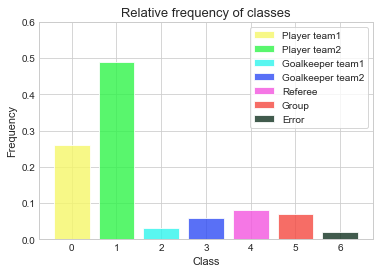

In [8]:
#Ex. 3.1

labels = ['Player team1','Player team2','Goalkeeper team1','Goalkeeper team2', \
          'Referee', 'Group', 'Error']
colors = ['#F6F769','#2FF449','#2FF4ED','#2F4CF4','#F355DF','#F44840', '#123220']

xlabels= [i for i in range(len(frequen))]
style.use('seaborn-whitegrid')

percen = [round(frequen[i]/len(trainTarget),2) for i in range(len(frequen))]

for i in range(7):
    plt.bar(xlabels[i], percen[i], label=labels[i], color=colors[i], alpha=0.8, edgecolor='white')
plt.legend(loc='best', frameon=True)
plt.title('Relative frequency of classes',fontsize=13)
plt.xlabel("Class", fontsize=11)
plt.ylabel("Frequency", fontsize=11)
plt.ylim([0.0,0.6])
plt.show();

In [9]:
percen2 = pd.DataFrame(percen)
percen2.index.names = ['Class']
percen2.columns = ['Relative Frequency']
percen2

,Relative Frequency
Class,
0,0.26
1,0.49
2,0.03
3,0.06
4,0.08
5,0.07
6,0.02


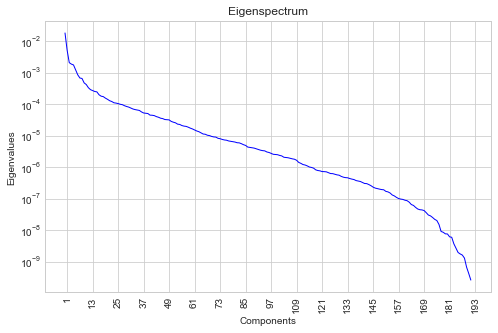

In [10]:
# Ex. 3.2 Plotting eigenvalues versus PCs

mu = np.mean(trainInput, axis=0)
data = np.matrix(trainInput - mu)
cov = (data.T * data) / (data.shape[0])
e, evecs = np.linalg.eig(cov)
idx = np.argsort(e)
top = e[idx][::-1]

k1 = [i for i in range(1, len(e)+9, 12)]

plt.figure(figsize=(8,5))
plt.gca().set_yscale('log')
plt.plot(top, linewidth=1, color='b')
plt.xlabel('Components')
plt.title("Eigenspectrum")
plt.ylabel('Eigenvalues')
plt.xticks(k1, rotation="vertical")
plt.show();

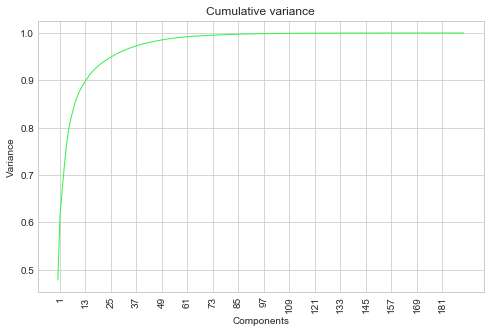

In [11]:
#Plotting cumulative variance versus PC

var_per = np.cumsum(e/np.sum(e))
k2 = [i for i in range(1, len(e)+1, 12)]

plt.figure(figsize=(8,5))
plt.plot(var_per, color='#2FF449', linewidth=1)
plt.xlabel('Components')
plt.title("Cumulative variance")
plt.ylabel('Variance')

# set the locations and labels of the xticks
plt.xticks(k2, rotation="vertical")
# plt.axvline(x=14, color="gray", linestyle='--', linewidth=1)
# plt.axhline(y=0.90534767, color="gray", linestyle='--', linewidth=1)
plt.show();

In [12]:
nPc = 0
while True:
    if round(var_per[nPc], 2) == .90:
        break;
    else:
         nPc+=1
print("Number of components needed to explain 90 percentage of the variance: %0d" % nPc)

Number of components needed to explain 90 percentage of the variance: 13


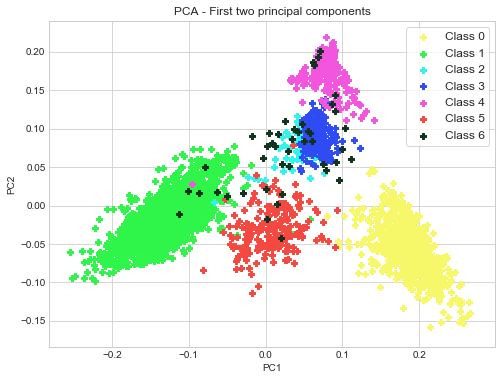

In [13]:
# PCA 

x = trainInput
y = trainTarget

pca = PCA(n_components=2, svd_solver='full')
x_T = pca.fit_transform(x)

# plot of the components
fig, ax = plt.subplots(figsize=(8,6))
colors = ['#F6F769','#2FF449','#2FF4ED','#2F4CF4','#F355DF','#F44840', '#123220']

for i in range(7):
    plt.scatter(x_T[y==i, 0], x_T[y==i, 1], c=colors[i], marker='P', label='Class %d' %i)

plt.title('PCA - First two principal components', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
plt.legend(loc='best', fontsize=12, frameon=True)
plt.show();

In [14]:
#Normalization 

from sklearn.preprocessing import normalize
norm_data = normalize(trainInput, norm="l2", axis=0)

In [15]:
#Starting points for initialization

idx = []
for i in range(7):
    idx.append(next(index for index, clas in enumerate(y) if clas==i))
print(idx)

#x2 = norm_data
x2 = np.matrix(x - np.mean(x, axis=0))
startingPoint = np.vstack((x2[idx[0],:], x2[idx[1],:], x2[idx[2],:], x2[idx[3],:], x2[idx[4],:], x2[idx[5],:], x2[idx[6],:]))

[0, 766, 2221, 2303, 2479, 2729, 2937]


In [16]:
startingPoint.shape

(7, 192)

In [17]:
#Finding regions with high density (k-means)

k=7
kmeans = KMeans(n_clusters=k, n_init=1, init=startingPoint, random_state=0, algorithm="full").fit(x2)
centroids = kmeans.cluster_centers_

#Projected the high dimensional cluster centers down to two dimensions
centers = np.dot(pca.components_, centroids.T)

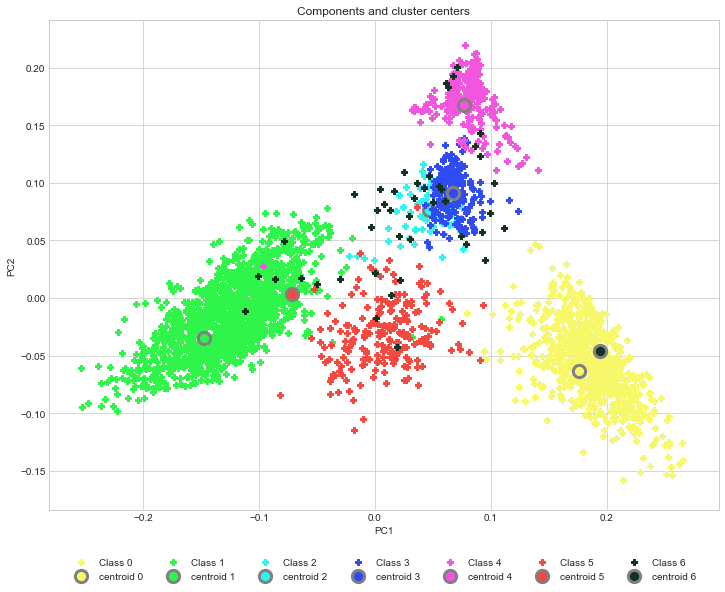

In [19]:
# plot the results along with the labels

fig, ax = plt.subplots(figsize=(12,9))
colors = ['#F6F769','#2FF449','#2FF4ED','#2F4CF4','#F355DF','#F44840', '#123220']

for i in range(7):
    plt.scatter(x_T[y==i, 0], x_T[y==i, 1], c=colors[i], marker='P', label='Class %d' %i)
    ax.scatter(centers[0,i], centers[1,i], s=150, marker='o', c=colors[i], edgecolor="gray", linewidth='3', label='centroid %d' %i)
plt.title('Components and cluster centers', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
ax.legend(fontsize=10, ncol=7, loc='upper center', bbox_to_anchor=(0.5, -0.08), frameon=False)
plt.show();